In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore", UserWarning)
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset to a pandas Dataframe

In [ ]:
df = pd.read_csv('Sonar data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


# Number of rows and columns

In [ ]:
df.shape

(208, 61)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

# Checking for null values

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

### Naming the Classes

In [ ]:
# Since there is no column name so lets add that
# column 0 to 59 so they will be named as Feature 0,..,Feature 59
# and lets name target column as Class

# First lets make a list of column name
new_column_names = []
for i in range(60):
    new_column_names.append(f"Feature_{i}")

new_column_names.append("Class")

new_column_names[55:]

['Feature_55', 'Feature_56', 'Feature_57', 'Feature_58', 'Feature_59', 'Class']

In [ ]:
# Now lets assign it by simply using this

df.columns = new_column_names
df

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


### Class Distribution

In [ ]:
# number of classes present in the dataset
df.Class.value_counts()

M    111
R     97
Name: Class, dtype: int64

### Data Types

In [ ]:
df.dtypes

Feature_0     float64
Feature_1     float64
Feature_2     float64
Feature_3     float64
Feature_4     float64
               ...   
Feature_56    float64
Feature_57    float64
Feature_58    float64
Feature_59    float64
Class           int64
Length: 61, dtype: object

### Replacing the Class with Numeric Value

In [ ]:
# Replacing M with 0 and R with 1
df = df.replace({'Class': {'M': 0,'R': 1}})
df["Class"]

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Class, Length: 208, dtype: int64

### Statistical Overview

In [ ]:
print("Stastical Overview")
print("============================================================")
df.describe()

Stastical Overview


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


### Creating table for Running Queries and importing through psycopg2

In [ ]:
query="create table Sonar({})".format(str(new_column_names))

query

In [ ]:
def listToString(s):

    # initialize an empty string
    str1 = ""

    # traverse in the string
    for ele in s:
        str1 += ' text, '+ele

    # return string
    return str1

In [ ]:
x=listToString(new_column_names)

In [ ]:
new_column_names = []
for i in range(60):
    new_column_names.append(f"Feature_{i}")

new_column_names.append("Class")

new_column_names[55:]

In [ ]:
new_column_names=new_column_names[0:60]

In [ ]:
x=x[7:]

In [ ]:
x=x+' text'

In [ ]:
x

In [ ]:
query="create table Sonar({})".format(x)

query

## Importing Psycopg2 Library

In [ ]:
import psycopg2

connection=psycopg2.connect(database="pythonlab", user="postgres", password="zeko@2312")

cursor=connection.cursor()

cursor.execute(query)

connection.commit()

In [ ]:
for i in df.index:
    vals=[df.at[i,col] for col in list(df.columns)]
    query="insert into sonar values('%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s')" % (vals[0],vals[1],vals[2],vals[3],vals[4],vals[5],vals[6],vals[7],vals[8],vals[9],vals[10],vals[11],vals[12],vals[13],vals[14],vals[15],vals[16],vals[17],vals[18],vals[19],vals[20],vals[21],vals[22],vals[23],vals[24],vals[25],vals[26],vals[27],vals[28],vals[29],vals[30],vals[31],vals[32],vals[33],vals[34],vals[35],vals[36],vals[37],vals[38],vals[39],vals[40],vals[41],vals[42],vals[43],vals[44],vals[45],vals[46],vals[47],vals[48],vals[49],vals[50],vals[51],vals[52],vals[53],vals[54],vals[55],vals[56],vals[57],vals[58],vals[59],vals[60])
    cursor.execute(query)
connection.commit()

### Loading the dataset from PgAdmin database using Select function

In [ ]:
import psycopg2

connection=psycopg2.connect(database="pythonlab", user="postgres", password="zeko@2312")
cursor=connection.cursor()

query = "SELECT * FROM Sonar"
df1 = pd.read_sql_query(query, connection)

In [ ]:
df1

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,class
0,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.018,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.015,0.0085,0.0073,0.005,0.0044,0.004,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.059,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.011,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.163,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.076,0.0958,0.099,0.1018,0.103,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.018,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.016,0.0029,0.0051,0.0062,0.0089,0.014,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.049,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [ ]:
df.groupby('Class').mean()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59
Class,,,,,,,,,,,,,,,,,,,,,
0,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
1,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
new_df = df[['Class','Feature_10','Feature_11','Feature_48','Feature_9','Feature_44' , 'Feature_47' , 'Feature_8','Feature_12','Feature_45']]
new_df

,Class,Feature_10,Feature_11,Feature_48,Feature_9,Feature_44,Feature_47,Feature_8,Feature_12,Feature_45
0,1,0.1609,0.1582,0.0383,0.2111,0.2641,0.1343,0.3109,0.2238,0.1386
1,1,0.4918,0.6552,0.0409,0.2872,0.0621,0.0742,0.3337,0.6919,0.0203
2,1,0.6333,0.7060,0.0130,0.6194,0.2111,0.0744,0.5598,0.5544,0.0176
3,1,0.0881,0.1992,0.0681,0.1264,0.4295,0.1576,0.0598,0.0184,0.3654
4,1,0.4152,0.3952,0.0230,0.4459,0.0692,0.0085,0.3564,0.4256,0.0528
...,...,...,...,...,...,...,...,...,...,...
203,0,0.3108,0.2933,0.0858,0.2684,0.0902,0.1363,0.2328,0.2275,0.1085
204,0,0.3085,0.3425,0.0647,0.2154,0.0954,0.1255,0.1030,0.2990,0.0080
205,0,0.2716,0.2374,0.0535,0.2529,0.0910,0.1005,0.1258,0.1878,0.0757
206,0,0.2898,0.2812,0.0489,0.2354,0.1319,0.0954,0.1945,0.1578,0.0985


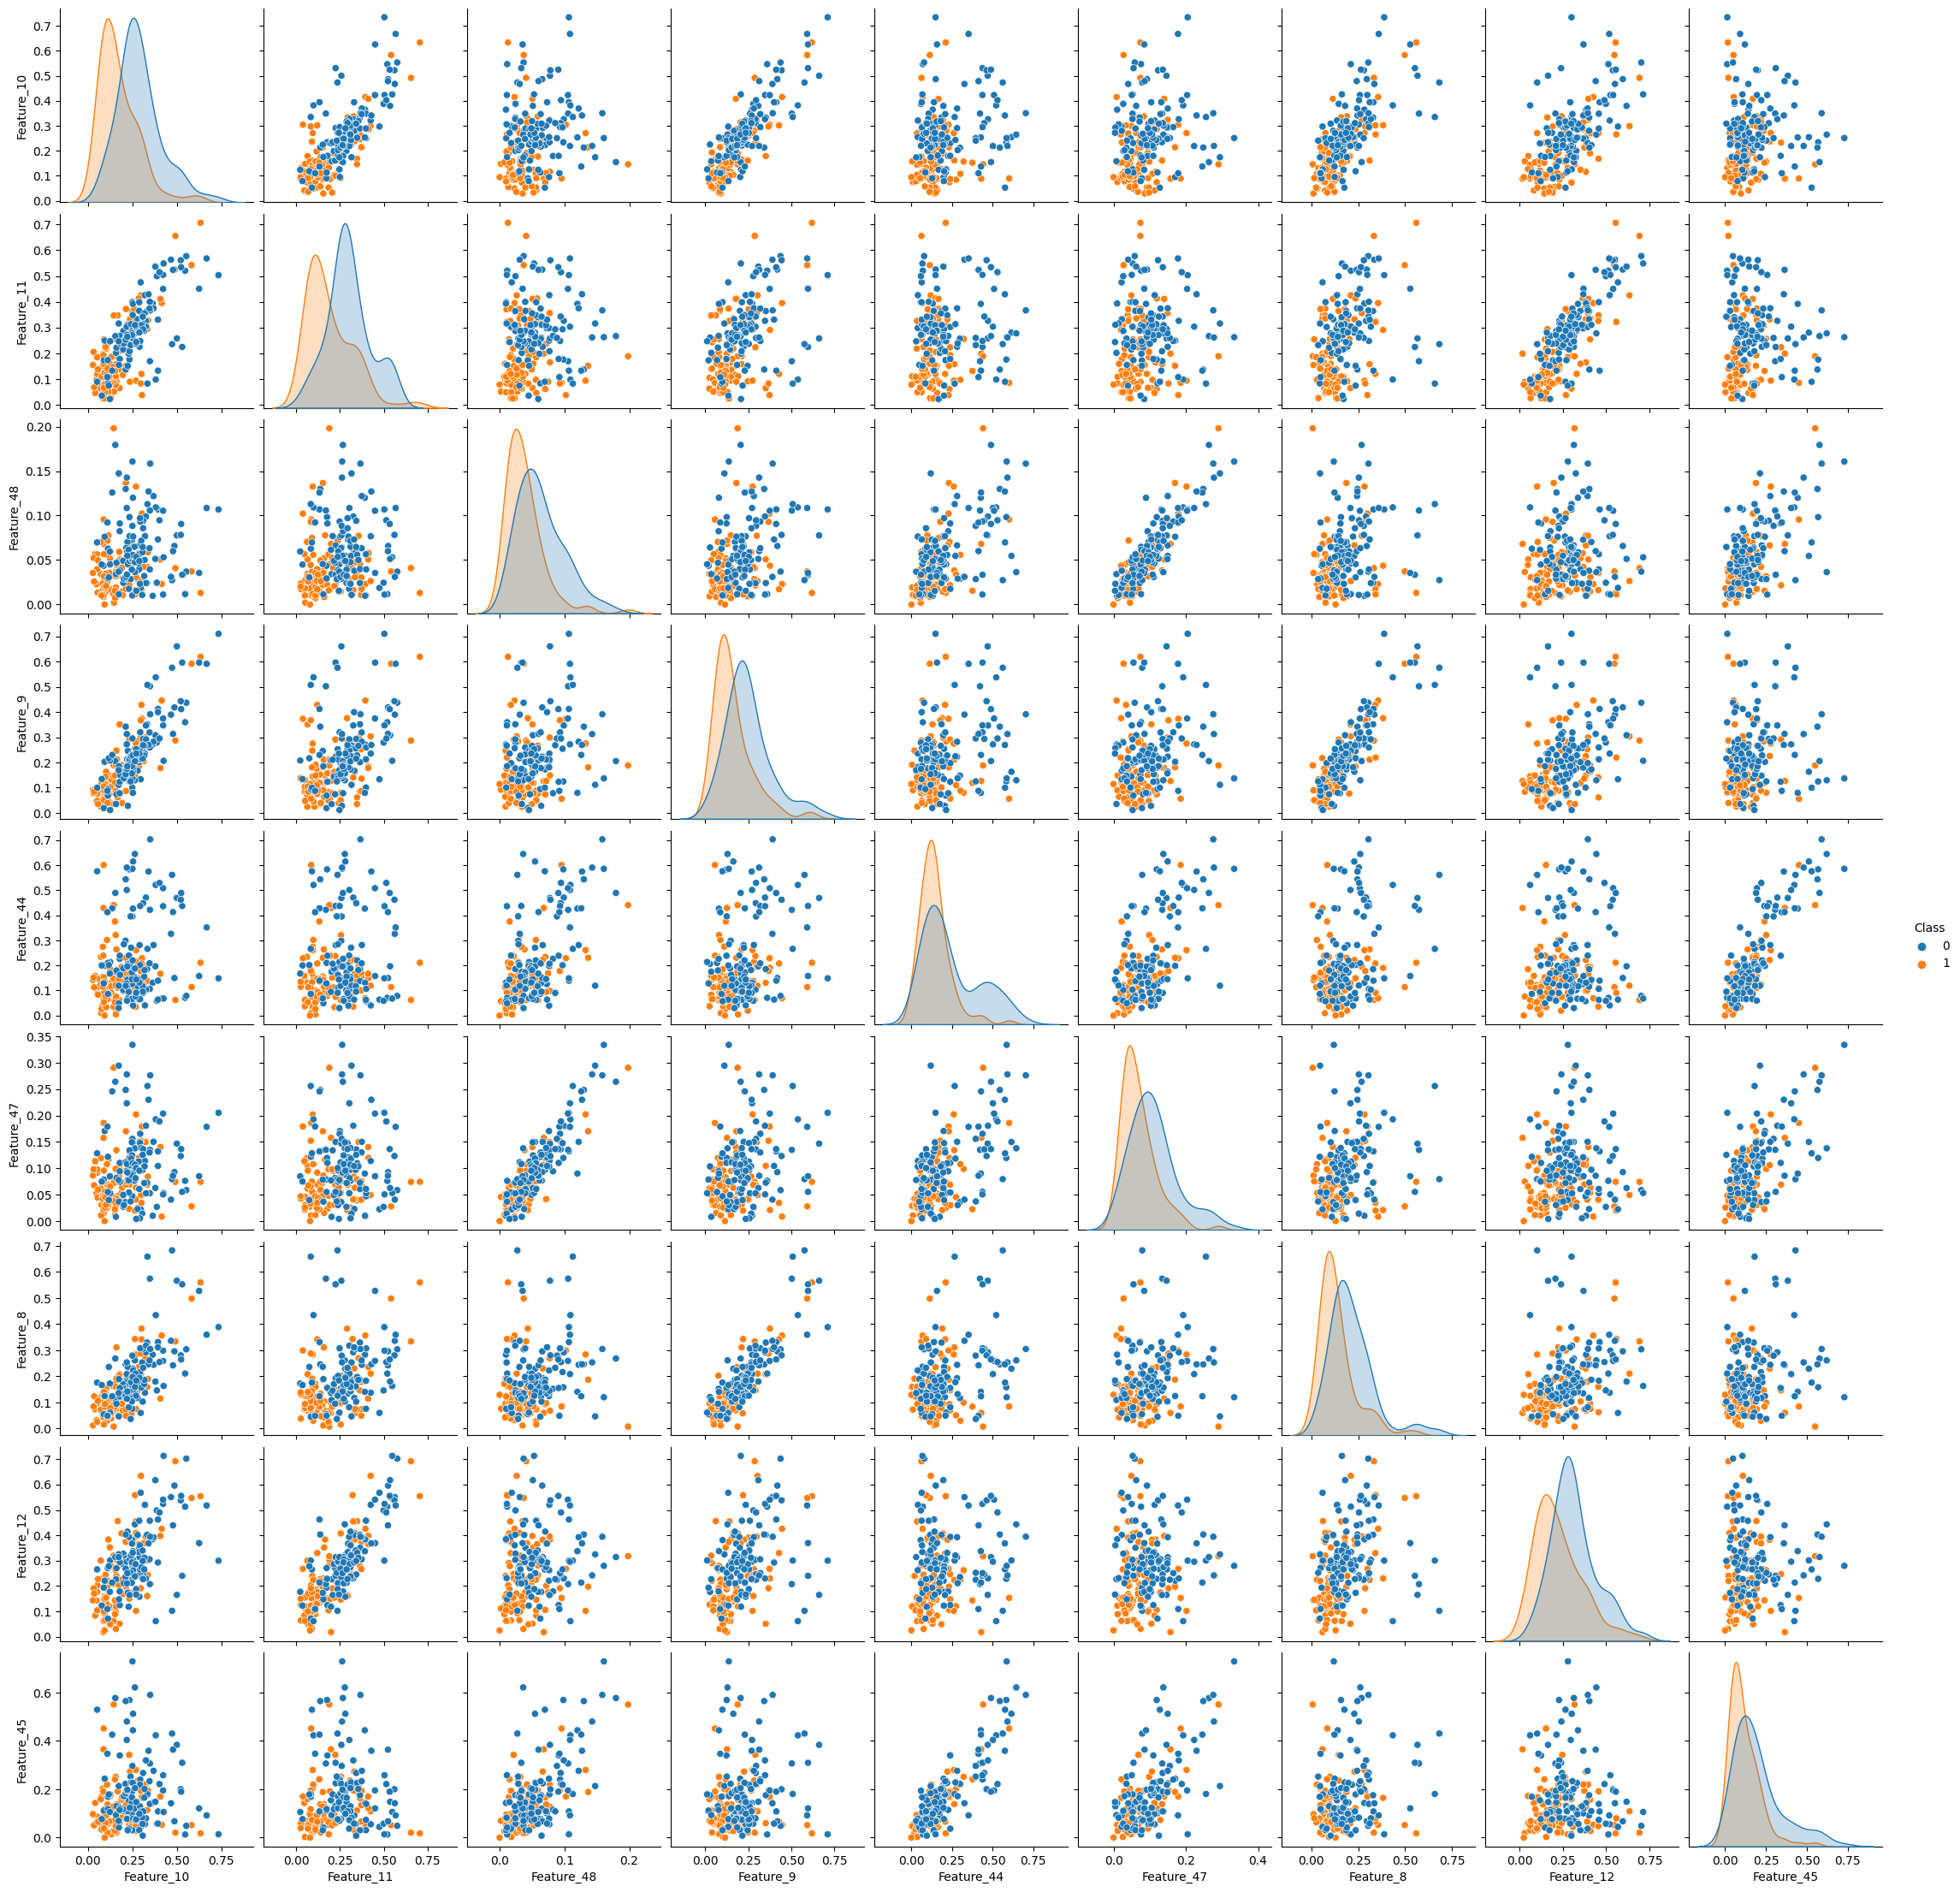

In [ ]:
sns.pairplot(new_df,hue="Class")

In [ ]:
df2=df1.copy()
df2

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,class
0,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.018,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.015,0.0085,0.0073,0.005,0.0044,0.004,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.059,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.011,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.163,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.076,0.0958,0.099,0.1018,0.103,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.018,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.016,0.0029,0.0051,0.0062,0.0089,0.014,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.049,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


## Exploration of Class

<AxesSubplot: xlabel='class', ylabel='count'>

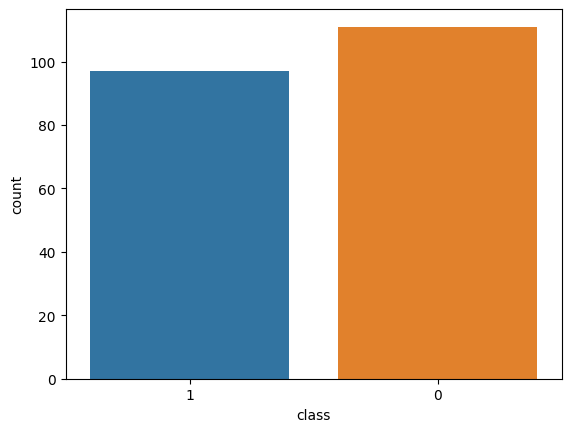

In [ ]:
sns.countplot(data=df2,x='class')

## Separating data and Labels

In [ ]:
X = df2.drop(columns="class", axis=1)
Y = df2["class"]
print(X)
print(Y)

    feature_0 feature_1 feature_2 feature_3 feature_4 feature_5 feature_6  \
0        0.02    0.0371    0.0428    0.0207    0.0954    0.0986    0.1539   
1      0.0453    0.0523    0.0843    0.0689    0.1183    0.2583    0.2156   
2      0.0262    0.0582    0.1099    0.1083    0.0974     0.228    0.2431   
3        0.01    0.0171    0.0623    0.0205    0.0205    0.0368    0.1098   
4      0.0762    0.0666    0.0481    0.0394     0.059    0.0649    0.1209   
..        ...       ...       ...       ...       ...       ...       ...   
203    0.0187    0.0346    0.0168    0.0177    0.0393     0.163    0.2028   
204    0.0323    0.0101    0.0298    0.0564     0.076    0.0958     0.099   
205    0.0522    0.0437     0.018    0.0292    0.0351    0.1171    0.1257   
206    0.0303    0.0353     0.049    0.0608    0.0167    0.1354    0.1465   
207     0.026    0.0363    0.0136    0.0272    0.0214    0.0338    0.0655   

    feature_7 feature_8 feature_9  ... feature_50 feature_51 feature_52  \


# Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.08, stratify=Y, random_state=1)
print(X.shape, X_train.shape, X_test.shape)
print("==========================================================================================================")
print(X_train)
print(Y_train)

(208, 60) (191, 60) (17, 60)
    feature_0 feature_1 feature_2 feature_3 feature_4 feature_5 feature_6  \
158    0.0107    0.0453    0.0289    0.0713    0.1075    0.1019    0.1606   
72     0.0208    0.0186    0.0131    0.0211     0.061    0.0613    0.0612   
120    0.0346    0.0509    0.0079    0.0243    0.0432    0.0735    0.0938   
41     0.0093    0.0185    0.0056    0.0064     0.026    0.0458     0.047   
2      0.0262    0.0582    0.1099    0.1083    0.0974     0.228    0.2431   
..        ...       ...       ...       ...       ...       ...       ...   
140    0.0412    0.1135    0.0518    0.0232    0.0646    0.1124    0.1787   
42     0.0211    0.0319    0.0415    0.0286    0.0121    0.0438    0.1299   
154    0.0117    0.0069    0.0279    0.0583    0.0915    0.1267    0.1577   
131     0.115    0.1163    0.0866    0.0358    0.0232    0.1267    0.2417   
203    0.0187    0.0346    0.0168    0.0177    0.0393     0.163    0.2028   

    feature_7 feature_8 feature_9  ... feature

# Model Training --> Logistic Regression

In [ ]:
model = LogisticRegression()

### Training the Logistic Regression model with training data

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

### Accuracy on training data

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8429319371727748


### Accuracy on test data

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7647058823529411


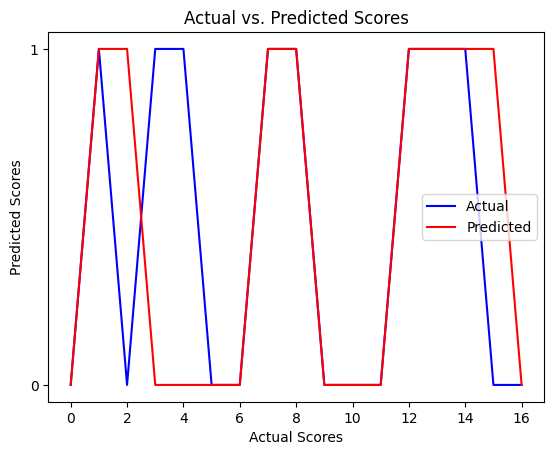

In [ ]:
# split the data into features (X) and target variable (y)
X = df2.iloc[:, :-1]
y = df2.iloc[:, 1]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.08, stratify=Y, random_state=1)

# train the model
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

# make predictions on the test set
y_test_prediction = regressor.predict(X_test)

# create a scatter plot of the actual vs predicted values with custom colors
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_test_prediction, label='Predicted', color='red')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs. Predicted Scores')
plt.legend()
plt.show()


# Making a Predictive System

In [ ]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] =='R'):
    print('The object is a Rock')
else:
    print('The object is a mine')

['0']
The object is a mine


### Importing other important Libraries to Run different ML Models

In [ ]:
import operator
## Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import (cross_val_score, KFold,
                                     StratifiedKFold, train_test_split,
                                     GridSearchCV)
from sklearn.metrics import confusion_matrix, classification_report

## Piprline
from sklearn.pipeline import make_pipeline

### Linear Estimatiors
from sklearn.linear_model import LogisticRegression, SGDClassifier
### non Linear Estimatiors
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
### Ensemble Estimatiors

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier)
### Metrics
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, classification_report, RocCurveDisplay)

### Separating the Class and splitting data into training and test datasets

In [ ]:
X = df2.drop(columns='class', axis=1)
y = df2['class']
'''
I split our data into Training and testing sets,
I specified my test size to 15% of the dataset
and last, I chose a random state of 101
'''
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.14, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Storing the Models into Dictionary format

In [ ]:
np.random.seed(101)
models = {
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

Skfold = StratifiedKFold(n_splits = 13)
metrics = ['accuracy']

### Plotting the Predicted vs Actual Values of each Models

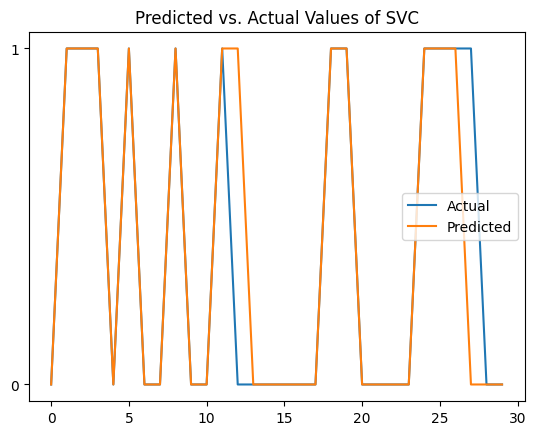

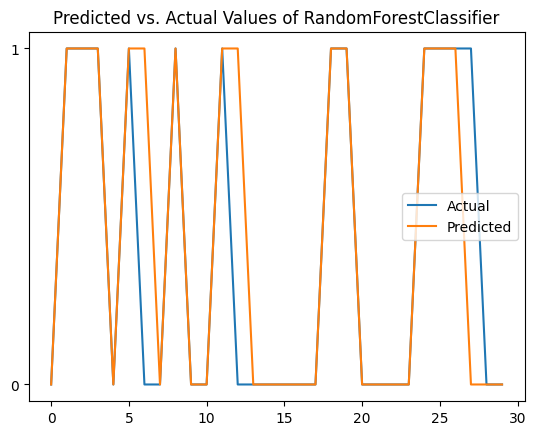

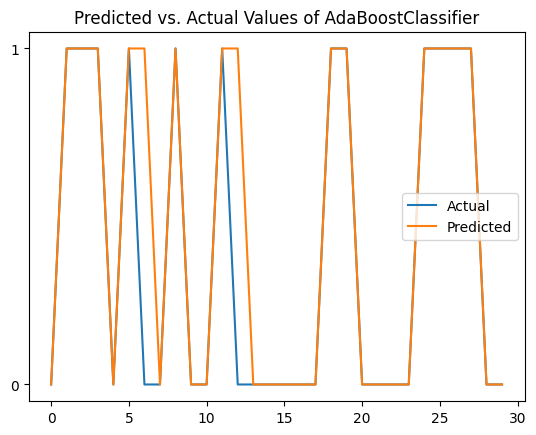

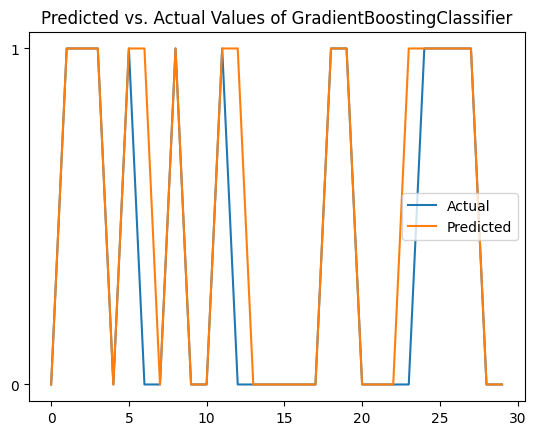

Best Estimator : GradientBoostingClassifier with score = 93.59


{'SVC': 0.7179,
 'RandomForestClassifier': 0.7308,
 'AdaBoostClassifier': 0.7692,
 'GradientBoostingClassifier': 0.9359}

In [ ]:
np.random.seed(101)
score ={}
def mod(model):
    for k,v in model.items():
        v.fit(X_train, y_train)
        score[k] = np.round(cross_val_score(estimator= v, X= X_test,y= y_test, cv= Skfold, scoring = 'accuracy').mean(), 4)
        y_pred = v.predict(X_test)
        # Create a line plot for y_test and y_pred
        plt.plot(y_test.values, label='Actual')
        plt.plot(y_pred, label='Predicted')
        plt.legend()
        plt.title('Predicted vs. Actual Values of {:s}'.format(k))
        plt.show()
    best = max(score.items(), key=operator.itemgetter(1))[0]
    print(f'Best Estimator : {best} with score = {100*score[best]:.2f}')

    return score
mod(models)

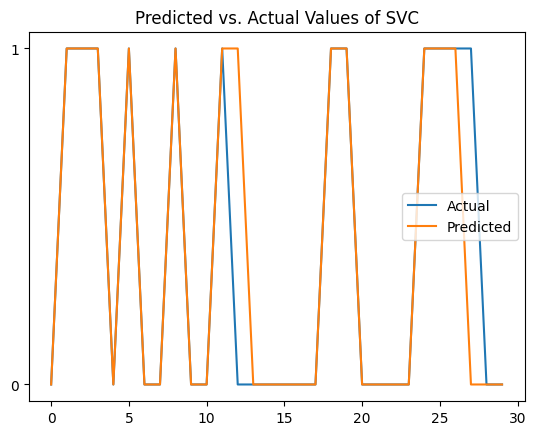

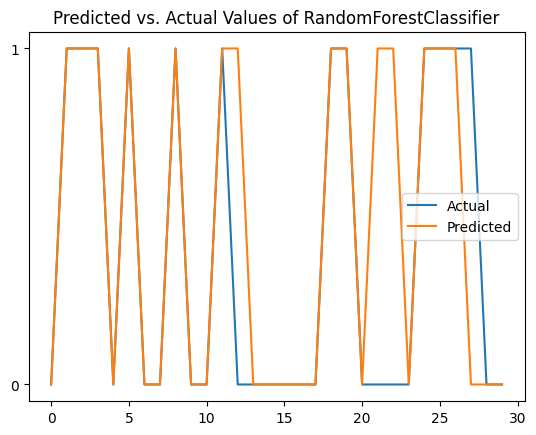

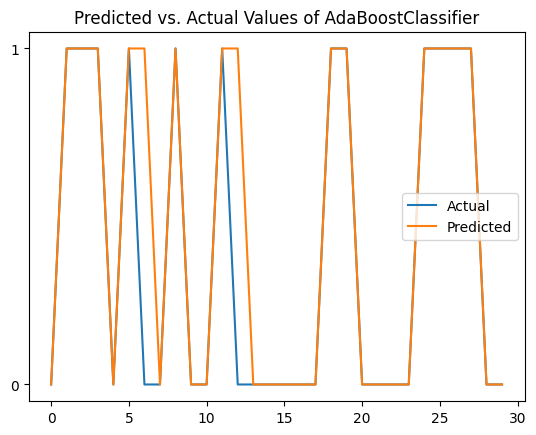

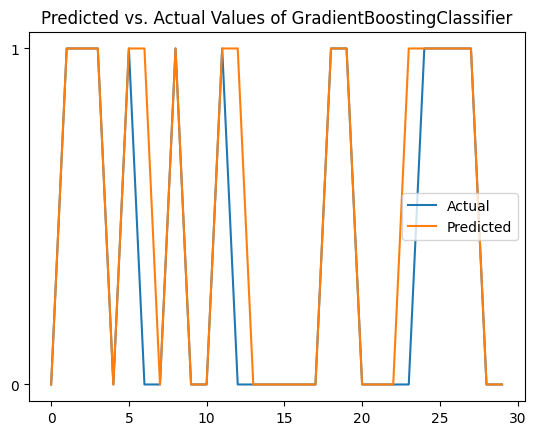

Best Estimator : GradientBoostingClassifier with score = 93.59


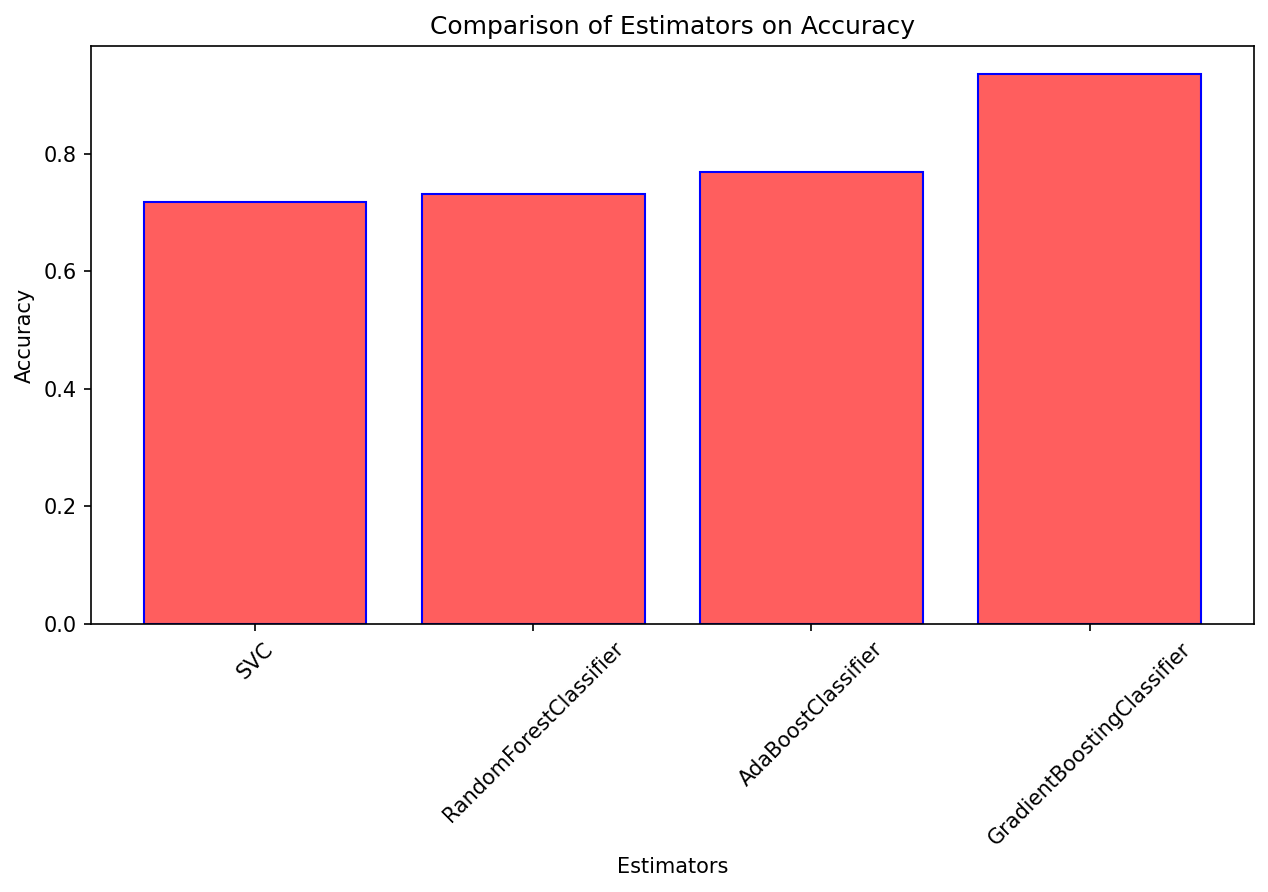

In [ ]:
# compare algorithms
results=mod(models)
estimators = list(results.keys())
score = list(results.values())


fig =  plt.figure(figsize= (10,5), dpi = 150)
plt.bar(range(len(results)), score, tick_label = estimators,
        color=(1, 0.1, 0.1, 0.7),  edgecolor='blue')
plt.xticks(rotation=45)
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.title('Comparison of Estimators on Accuracy');

### Comparison of Estimators on Accuracy

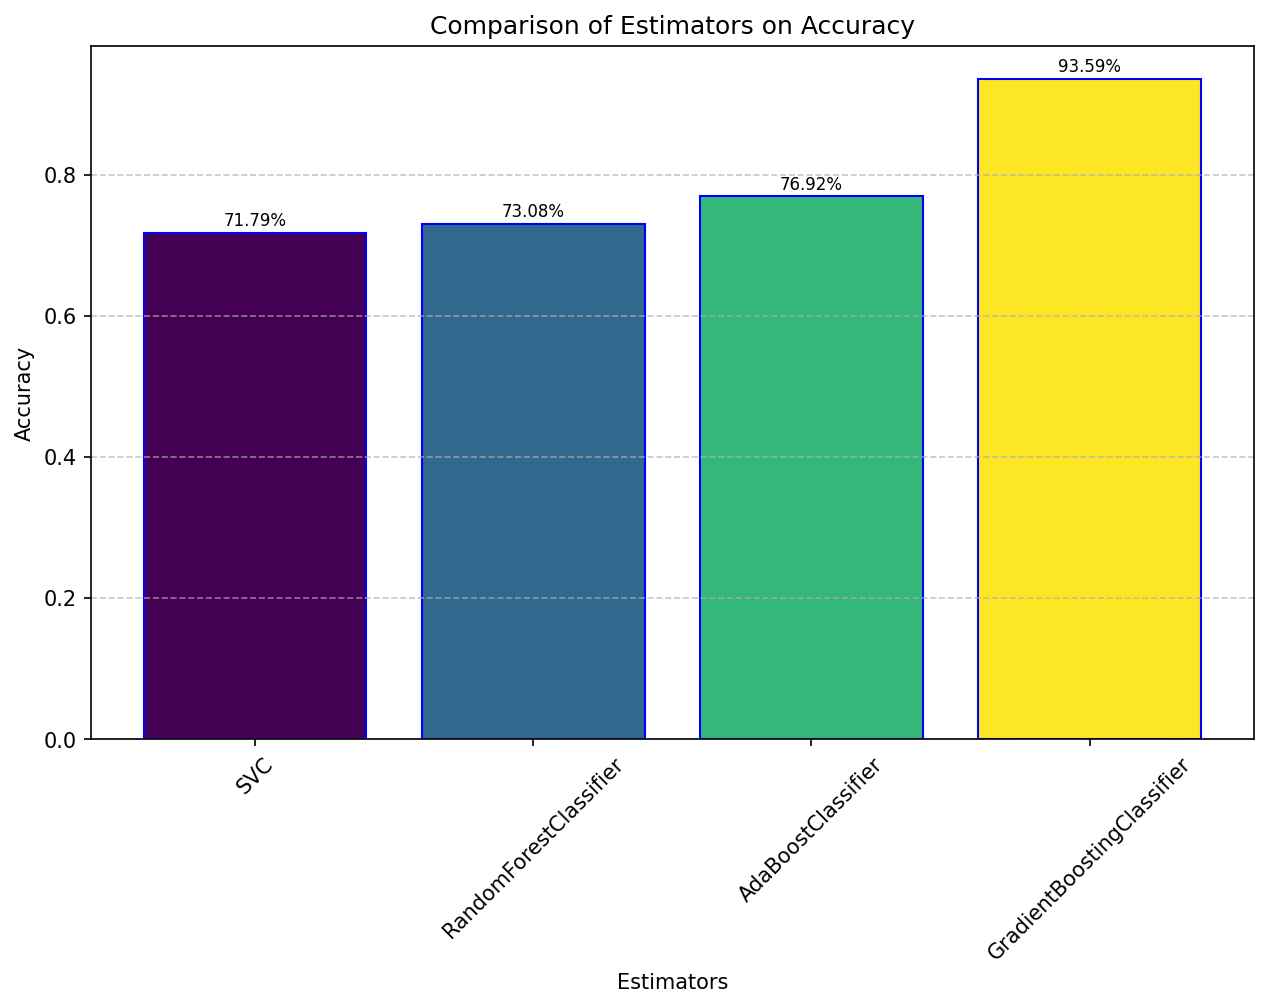

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
ax.bar(results.keys(), results.values(), color=plt.cm.viridis(np.linspace(0, 1, len(results))), edgecolor='blue')

# Add some text labels to the bars
for i, (k, v) in enumerate(results.items()):
    ax.text(k, v + 0.01, f"{100 * v:.2f}%", ha='center', fontsize=8)

# Customize the plot
ax.set_xlabel('Estimators')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Estimators on Accuracy')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()